In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.python.keras.layers import Input, Dense,RepeatVector, TimeDistributed, Dense, Dropout, LSTM
import sklearn
import seaborn as sns
import nltk
import pickle
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = read_csv('/content/drive/MyDrive/Clean_dataset.csv', engine='python')
# dataframe = dataframe[120:150]
dataframe = dataframe[dataframe.Cell == "A1692"]
dataframe.DATE_ID = pd.to_datetime(dataframe.DATE_ID)
dataframe = dataframe.set_index("DATE_ID")
dataset = dataframe.filter(['SPEECH_TRAFFIC'])
print(dataset.head())
dataframe = dataframe.drop("Unnamed: 0",axis=1)
dataframe.head()

Mounted at /content/drive
            SPEECH_TRAFFIC
DATE_ID                   
2019-03-01       1799.3290
2019-04-01       1677.3002
2019-05-01       1485.4834
2019-06-01       1640.6530
2019-07-01       1523.9731


Cell Tech & Band  ...  Utilization  UTIL_HIGH_CONGESTED
DATE_ID                        ...                                  
2019-03-01  A1692           A  ...    91.169998                 8.83
2019-04-01  A1692           A  ...    86.870003                 8.83
2019-05-01  A1692           A  ...    74.160004                 8.83
2019-06-01  A1692           A  ...    84.680000                 8.83
2019-07-01  A1692           A  ...    72.809998                 8.83

[5 rows x 9 columns]

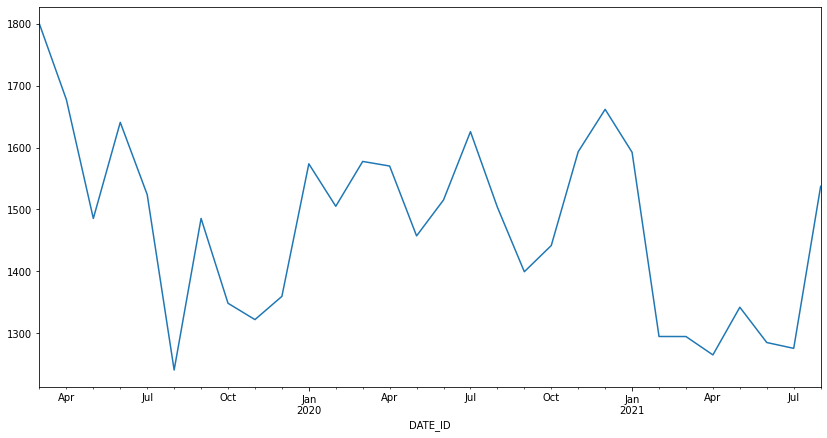

In [4]:
ax = dataset.SPEECH_TRAFFIC.plot(figsize=(14, 7))

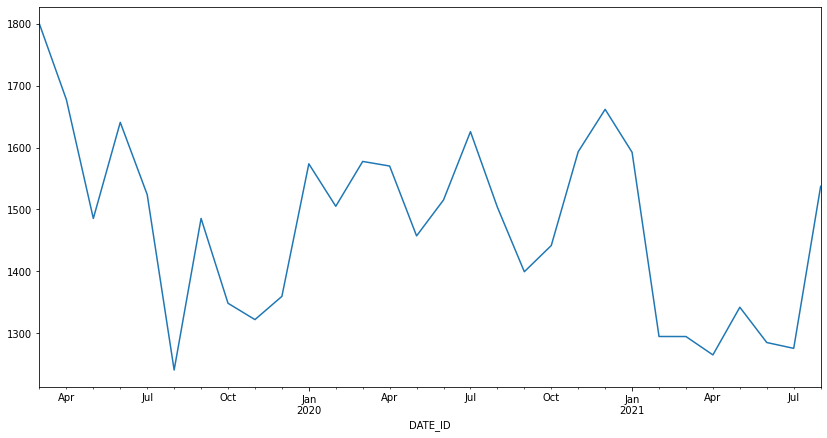

In [ ]:
ax = dataset.SPEECH_TRAFFIC.plot(figsize=(14, 7))

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
#Saving the model itself
import pickle
with open(r'scaler.pkl','wb') as model_pkl:
    pickle.dump(scaler, model_pkl, protocol=2)

In [7]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]

In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      # if (i%26 == 0 and i != 0):
        # i+=5
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
  
  # reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)

(21, 2)


In [9]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [10]:
from keras.layers import Dropout
from keras.layers import Bidirectional
# model=Sequential()
# model.add(LSTM(100,activation='relu',return_sequences=True,input_shape=(look_back,1)))
# model.add(LSTM(100, activation='relu', return_sequences=True))
# model.add(LSTM(100, activation='sigmoid', return_sequences=False))
# model.add(Dense(50))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(optimizer='adam',loss='mae')

model2 = tf.keras.Sequential([
        tf.keras.layers.LSTM(100,activation='relu',return_sequences=True,input_shape=(look_back,1)),
        tf.keras.layers.LSTM(100,activation='relu',return_sequences=True),
        tf.keras.layers.LSTM(100,activation='sigmoid',return_sequences=False),
        tf.keras.layers.Dense(50),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)
        ])
model2.compile(optimizer='adam',loss='mae')

In [ ]:
Xdata_train=[]
Ydata_train=[]

Xdata_train, Ydata_train = create_dataset(train, look_back)
Xdata_train = np.reshape(Xdata_train, (Xdata_train.shape[0], Xdata_train.shape[1], 1))

#training for train data
history = model2.fit(Xdata_train,Ydata_train,batch_size=1,epochs=500,shuffle=False)

Epoch 1/500
21/21 [==============================] - 3s 7ms/step - loss: 0.3584
Epoch 2/500
21/21 [==============================] - 0s 5ms/step - loss: 0.3120
Epoch 3/500
21/21 [==============================] - 0s 6ms/step - loss: 0.3627
Epoch 4/500
21/21 [==============================] - 0s 6ms/step - loss: 0.3195
Epoch 5/500
21/21 [==============================] - 0s 6ms/step - loss: 0.2869
Epoch 6/500
21/21 [==============================] - 0s 7ms/step - loss: 0.3155
Epoch 7/500
21/21 [==============================] - 0s 6ms/step - loss: 0.2423
Epoch 8/500
21/21 [==============================] - 0s 5ms/step - loss: 0.2945
Epoch 9/500
21/21 [==============================] - 0s 6ms/step - loss: 0.2390
Epoch 10/500
21/21 [==============================] - 0s 6ms/step - loss: 0.2491
Epoch 11/500
21/21 [==============================] - 0s 6ms/step - loss: 0.3370
Epoch 12/500
21/21 [==============================] - 0s 5ms/step - loss: 0.2685
Epoch 13/500
21/21 [=================

In [11]:
def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape

In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testScoreMAE = (mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MAE' % (testScoreMAE))
testScoreMAE_Percentage = MAPE(testY[0], testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScoreMAE_Percentage))

NameError: ignored

- **Saving the model as pickle file**

In [ ]:
#for heavy model architectures, .h5 file is unsupported.
# weigh= model.get_weights();    pklfile= "modelweights.pkl"
# fpkl= open(pklfile, 'wb')    #Python 3     
# pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
# fpkl.close()



# #Saving the model itself
# import pickle
# with open(r'LSTM_Model.pkl','wb') as model_pkl:
#     pickle.dump(model, model_pkl, protocol=2)



# model2.save('LSTM_model3.h5')



serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
# model.save_weights("LSTM_model_weights.h5")
# print("Saved model to disk")


# with open('LSTM_model.json', 'w') as json_file:
#     json_file.write(model.to_json())

Saved model to disk


#Clustering by Speech Traffic

In [12]:
from google.colab import drive
drive.mount('/content/drive')

# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe2 = read_csv('/content/drive/MyDrive/Clean_dataset.csv', engine='python')
dataframe2 = dataframe2.rename(columns={"Unnamed: 0":"Index"})
dataframe2.DATE_ID = pd.to_datetime(dataframe2.DATE_ID)
dataframe2["DATE_IDs"] = dataframe2["DATE_ID"]
dataframe2 = dataframe2.set_index("DATE_ID")
cells = pd.unique(dataframe2.Cell)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
l1 =[]
selectedCells =[]
dataframe_vectors = pd.DataFrame()
for i in cells:
  dataframe = dataframe2[dataframe2.Cell == "{}".format(i)]
  dataset = dataframe.filter(['SPEECH_TRAFFIC'])
  if(dataset.size != 30):
    continue
  # normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)
  
  l1 =dataset.reshape(1,30)
  dataframe_vectors = dataframe_vectors.append(pd.DataFrame(l1))
  selectedCells.append(i)

In [ ]:
dataframe_vectors = dataframe_vectors.transpose()
dataframe_vectors.columns= list(selectedCells)

In [ ]:
dataframe_vectors

A11      A110     A1100  ...     B4888       B49      B497
0   0.935052  0.368681  0.878890  ...  0.339612  1.000000  0.949353
1   0.885486  0.316168  0.826961  ...  0.278330  0.916078  0.392693
2   0.866104  0.279325  0.767904  ...  0.261689  0.838597  0.412086
3   0.892650  0.203276  0.739181  ...  0.241125  0.792981  0.755347
4   1.000000  0.340362  1.000000  ...  0.339475  0.847255  0.971883
5   0.909796  0.349194  0.887202  ...  0.272625  0.813331  0.637544
6   0.728264  0.319158  0.810274  ...  0.250321  0.757355  0.455841
7   0.144071  0.309364  0.947328  ...  0.226024  0.586380  0.380715
8   0.586532  0.211664  0.885539  ...  0.190930  0.306711  0.396722
9   0.218732  0.161081  0.972847  ...  0.216882  0.283856  0.250949
10  0.059232  0.046005  0.626329  ...  0.145811  0.113997  0.159225
11  0.048528  0.000000  0.225542  ...  0.156571  0.335175  0.138705
12  0.089693  1.000000  0.242042  ...  0.120871  0.351297  0.117410
13  0.009816  0.497932  0.161255  ...  0.083262  0.082725  0.526280
14  0.000467  0.214752  0.166438  ...  0.049644  0.057678  0.732232
15  0.007837  0.269970  0.192801  ...  0.000000  0.000000  0.301153
16  0.054348  0.292320  0.213208  ...  0.111971  0.062321  0.380118
17  0.050874  0.215134  0.250187  ...  0.232480  0.053218  0.461046
18  0.012773  0.316404  0.151833  ...  0.893181  0.113494  0.087539
19  0.022208  0.348192  0.142765  ...  0.959665  0.116532  0.055833
20  0.003168  0.318210  0.101363  ...  1.000000  0.124496  0.000000
21  0.000785  0.378785  0.064499  ...  0.909392  0.131324  0.955598
22  0.000000  0.511147  0.060053  ...  0.596352  0.061969  1.000000
23  0.012809  0.810325  0.008007  ...  0.497972  0.142652  0.780857
24  0.017096  0.868311  0.021507  ...  0.621676  0.592371  0.724308
25  0.011284  0.703765  0.000000  ...  0.516603  0.133526  0.465503
26  0.000035  0.609993  0.011128  ...  0.424202  0.088058  0.500186
27  0.008636  0.602654  0.055502  ...  0.270117  0.051240  0.127317
28  0.028636  0.454009  0.025871  ...  0.240966  0.060992  0.047951
29  0.020130  0.475129  0.055991  ...  0.234377  0.046650  0.026193

[30 rows x 1706 columns]

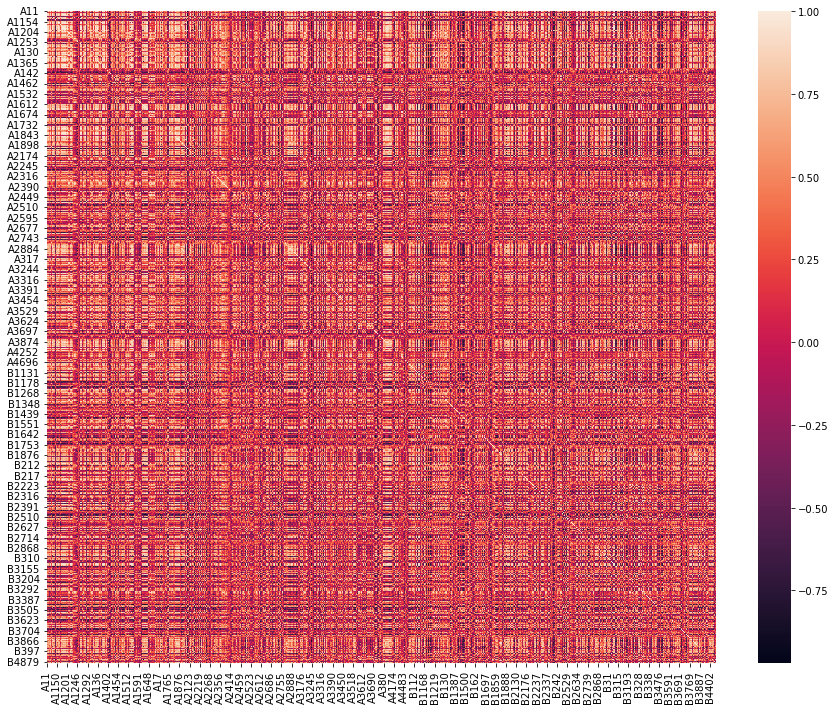

In [ ]:
# dataframe = dataframe_vectors.dropna('columns')# drop columns with NaN
  
# allData_Corr = dataframe[[col for col in dataframe if dataframe[col].nunique() > 1]]# keep columns where there are more than 1 unique values
  
corr = dataframe_vectors.corr()
  
plt.figure(figsize =(15, 12))
  
sns.heatmap(corr)
  
plt.show()

In [ ]:
import scipy.cluster.hierarchy as spc

pdist = spc.distance.pdist(corr.values)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')

In [ ]:
clustered_cells = np.stack((selectedCells,idx), axis=1)

In [ ]:
clustered_cells[clustered_cells[:,1]=="1"]

array([['A1108', '1'],
       ['A1123', '1'],
       ['A1226', '1'],
       ['A128', '1'],
       ['A13', '1'],
       ['A1345', '1'],
       ['A1424', '1'],
       ['A1439', '1'],
       ['A1457', '1'],
       ['A1462', '1'],
       ['A1570', '1'],
       ['A16', '1'],
       ['A1607', '1'],
       ['A1692', '1'],
       ['A1727', '1'],
       ['A1741', '1'],
       ['A1884', '1'],
       ['A1885', '1'],
       ['A2128', '1'],
       ['A213', '1'],
       ['A2141', '1'],
       ['A2259', '1'],
       ['A2268', '1'],
       ['A2273', '1'],
       ['A2288', '1'],
       ['A23', '1'],
       ['A2424', '1'],
       ['A2553', '1'],
       ['A2607', '1'],
       ['A2612', '1'],
       ['A2634', '1'],
       ['A2696', '1'],
       ['A2728', '1'],
       ['A280', '1'],
       ['A2882', '1'],
       ['A2885', '1'],
       ['A2906', '1'],
       ['A310', '1'],
       ['A3123', '1'],
       ['A3128', '1'],
       ['A3181', '1'],
       ['A3267', '1'],
       ['A3458', '1'],
       ['A3505', '1']

# clustering by Speech and Data

In [13]:
l1 =[]
selectedCells =[]
dataframe_vectors = pd.DataFrame()
for i in cells:
  dataframe = dataframe2[dataframe2.Cell == "{}".format(i)]
  dataset = dataframe.filter(['SPEECH_TRAFFIC','DATA_TRAFFIC'])
  if(dataset.size != 60):
    continue
  # normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)
  
  l1 =dataset.reshape(1,60)
  dataframe_vectors = dataframe_vectors.append(pd.DataFrame(l1))
  selectedCells.append(i)

In [14]:
dataframe_vectors.transpose()

0         0         0  ...         0         0         0
0   0.935052  0.368681  0.878890  ...  0.339612  1.000000  0.949353
1   0.521283  0.648962  0.794948  ...  0.390013  0.601843  0.429400
2   0.885486  0.316168  0.826961  ...  0.278330  0.916078  0.392693
3   0.639718  0.499489  0.988193  ...  0.455942  0.624350  0.361946
4   0.866104  0.279325  0.767904  ...  0.261689  0.838597  0.412086
5   0.754280  0.739939  0.941471  ...  0.516339  0.731868  0.267178
6   0.892650  0.203276  0.739181  ...  0.241125  0.792981  0.755347
7   0.869565  0.631157  0.812615  ...  0.422662  0.645690  0.469104
8   1.000000  0.340362  1.000000  ...  0.339475  0.847255  0.971883
9   1.000000  1.000000  0.784785  ...  0.997908  0.725993  0.894074
10  0.909796  0.349194  0.887202  ...  0.272625  0.813331  0.637544
11  0.786026  0.503349  1.000000  ...  0.598762  1.000000  1.000000
12  0.728264  0.319158  0.810274  ...  0.250321  0.757355  0.455841
13  0.618994  0.544244  0.890652  ...  0.696148  0.775381  0.407631
14  0.144071  0.309364  0.947328  ...  0.226024  0.586380  0.380715
15  0.180812  0.381577  0.833274  ...  0.340477  0.548011  0.330891
16  0.586532  0.211664  0.885539  ...  0.190930  0.306711  0.396722
17  0.489853  0.605985  0.654571  ...  0.477831  0.599728  0.217098
18  0.218732  0.161081  0.972847  ...  0.216882  0.283856  0.250949
19  0.297481  0.442501  0.593085  ...  0.826710  0.571450  0.295897
20  0.059232  0.046005  0.626329  ...  0.145811  0.113997  0.159225
21  0.120366  0.393999  0.513447  ...  0.314193  0.363631  0.110281
22  0.048528  0.000000  0.225542  ...  0.156571  0.335175  0.138705
23  0.192355  0.188921  0.383558  ...  0.231781  0.548826  0.120871
24  0.089693  1.000000  0.242042  ...  0.120871  0.351297  0.117410
25  0.199301  0.320268  0.414588  ...  0.463489  0.251585  0.084395
26  0.009816  0.497932  0.161255  ...  0.083262  0.082725  0.526280
27  0.047649  0.053771  0.179142  ...  0.630110  0.003341  0.172338
28  0.000467  0.214752  0.166438  ...  0.049644  0.057678  0.732232
29  0.007289  0.076363  0.051825  ...  0.799433  0.040143  0.152985
30  0.007837  0.269970  0.192801  ...  0.000000  0.000000  0.301153
31  0.010140  0.102308  0.034873  ...  0.483836  0.000000  0.069260
32  0.054348  0.292320  0.213208  ...  0.111971  0.062321  0.380118
33  0.043064  0.133340  0.043668  ...  0.702195  0.067574  0.072900
34  0.050874  0.215134  0.250187  ...  0.232480  0.053218  0.461046
35  0.055438  0.202837  0.040122  ...  0.501978  0.072195  0.167898
36  0.012773  0.316404  0.151833  ...  0.893181  0.113494  0.087539
37  0.013200  0.186769  0.014652  ...  0.849300  0.087396  0.058542
38  0.022208  0.348192  0.142765  ...  0.959665  0.116532  0.055833
39  0.030173  0.066536  0.003569  ...  0.954214  0.154989  0.057255
40  0.003168  0.318210  0.101363  ...  1.000000  0.124496  0.000000
41  0.015952  0.011944  0.002667  ...  0.889578  0.324115  0.000000
42  0.000785  0.378785  0.064499  ...  0.909392  0.131324  0.955598
43  0.000000  0.002560  0.000000  ...  0.729763  0.262427  0.315088
44  0.000000  0.511147  0.060053  ...  0.596352  0.061969  1.000000
45  0.014789  0.021059  0.000803  ...  0.895482  0.049243  0.454210
46  0.012809  0.810325  0.008007  ...  0.497972  0.142652  0.780857
47  0.017503  0.023024  0.001470  ...  0.959180  0.204962  0.241150
48  0.017096  0.868311  0.021507  ...  0.621676  0.592371  0.724308
49  0.005619  0.063079  0.002052  ...  0.191472  0.547941  0.254796
50  0.011284  0.703765  0.000000  ...  0.516603  0.133526  0.465503
51  0.000822  0.000000  0.001104  ...  0.000000  0.303738  0.082434
52  0.000035  0.609993  0.011128  ...  0.424202  0.088058  0.500186
53  0.001213  0.021723  0.002020  ...  1.000000  0.285744  0.183998
54  0.008636  0.602654  0.055502  ...  0.270117  0.051240  0.127317
55  0.001315  0.061476  0.001855  ...  0.902846  0.072513  0.037350
56  0.028636  0.454009  0.025871  ...  0.240966  0.060992  0.047951
57  0.018334  0.070803  0.002105  ...  0.559491  0.023095  0.036118

In [15]:
dataframe_vectors = dataframe_vectors.transpose()
dataframe_vectors.columns= list(selectedCells)

In [16]:
dataframe_vectors

A11      A110     A1100  ...     B4888       B49      B497
0   0.935052  0.368681  0.878890  ...  0.339612  1.000000  0.949353
1   0.521283  0.648962  0.794948  ...  0.390013  0.601843  0.429400
2   0.885486  0.316168  0.826961  ...  0.278330  0.916078  0.392693
3   0.639718  0.499489  0.988193  ...  0.455942  0.624350  0.361946
4   0.866104  0.279325  0.767904  ...  0.261689  0.838597  0.412086
5   0.754280  0.739939  0.941471  ...  0.516339  0.731868  0.267178
6   0.892650  0.203276  0.739181  ...  0.241125  0.792981  0.755347
7   0.869565  0.631157  0.812615  ...  0.422662  0.645690  0.469104
8   1.000000  0.340362  1.000000  ...  0.339475  0.847255  0.971883
9   1.000000  1.000000  0.784785  ...  0.997908  0.725993  0.894074
10  0.909796  0.349194  0.887202  ...  0.272625  0.813331  0.637544
11  0.786026  0.503349  1.000000  ...  0.598762  1.000000  1.000000
12  0.728264  0.319158  0.810274  ...  0.250321  0.757355  0.455841
13  0.618994  0.544244  0.890652  ...  0.696148  0.775381  0.407631
14  0.144071  0.309364  0.947328  ...  0.226024  0.586380  0.380715
15  0.180812  0.381577  0.833274  ...  0.340477  0.548011  0.330891
16  0.586532  0.211664  0.885539  ...  0.190930  0.306711  0.396722
17  0.489853  0.605985  0.654571  ...  0.477831  0.599728  0.217098
18  0.218732  0.161081  0.972847  ...  0.216882  0.283856  0.250949
19  0.297481  0.442501  0.593085  ...  0.826710  0.571450  0.295897
20  0.059232  0.046005  0.626329  ...  0.145811  0.113997  0.159225
21  0.120366  0.393999  0.513447  ...  0.314193  0.363631  0.110281
22  0.048528  0.000000  0.225542  ...  0.156571  0.335175  0.138705
23  0.192355  0.188921  0.383558  ...  0.231781  0.548826  0.120871
24  0.089693  1.000000  0.242042  ...  0.120871  0.351297  0.117410
25  0.199301  0.320268  0.414588  ...  0.463489  0.251585  0.084395
26  0.009816  0.497932  0.161255  ...  0.083262  0.082725  0.526280
27  0.047649  0.053771  0.179142  ...  0.630110  0.003341  0.172338
28  0.000467  0.214752  0.166438  ...  0.049644  0.057678  0.732232
29  0.007289  0.076363  0.051825  ...  0.799433  0.040143  0.152985
30  0.007837  0.269970  0.192801  ...  0.000000  0.000000  0.301153
31  0.010140  0.102308  0.034873  ...  0.483836  0.000000  0.069260
32  0.054348  0.292320  0.213208  ...  0.111971  0.062321  0.380118
33  0.043064  0.133340  0.043668  ...  0.702195  0.067574  0.072900
34  0.050874  0.215134  0.250187  ...  0.232480  0.053218  0.461046
35  0.055438  0.202837  0.040122  ...  0.501978  0.072195  0.167898
36  0.012773  0.316404  0.151833  ...  0.893181  0.113494  0.087539
37  0.013200  0.186769  0.014652  ...  0.849300  0.087396  0.058542
38  0.022208  0.348192  0.142765  ...  0.959665  0.116532  0.055833
39  0.030173  0.066536  0.003569  ...  0.954214  0.154989  0.057255
40  0.003168  0.318210  0.101363  ...  1.000000  0.124496  0.000000
41  0.015952  0.011944  0.002667  ...  0.889578  0.324115  0.000000
42  0.000785  0.378785  0.064499  ...  0.909392  0.131324  0.955598
43  0.000000  0.002560  0.000000  ...  0.729763  0.262427  0.315088
44  0.000000  0.511147  0.060053  ...  0.596352  0.061969  1.000000
45  0.014789  0.021059  0.000803  ...  0.895482  0.049243  0.454210
46  0.012809  0.810325  0.008007  ...  0.497972  0.142652  0.780857
47  0.017503  0.023024  0.001470  ...  0.959180  0.204962  0.241150
48  0.017096  0.868311  0.021507  ...  0.621676  0.592371  0.724308
49  0.005619  0.063079  0.002052  ...  0.191472  0.547941  0.254796
50  0.011284  0.703765  0.000000  ...  0.516603  0.133526  0.465503
51  0.000822  0.000000  0.001104  ...  0.000000  0.303738  0.082434
52  0.000035  0.609993  0.011128  ...  0.424202  0.088058  0.500186
53  0.001213  0.021723  0.002020  ...  1.000000  0.285744  0.183998
54  0.008636  0.602654  0.055502  ...  0.270117  0.051240  0.127317
55  0.001315  0.061476  0.001855  ...  0.902846  0.072513  0.037350
56  0.028636  0.454009  0.025871  ...  0.240966  0.060992  0.047951
57  0.018334  0.070803  0.002105  ...  0.559491  0.023095  0.0361

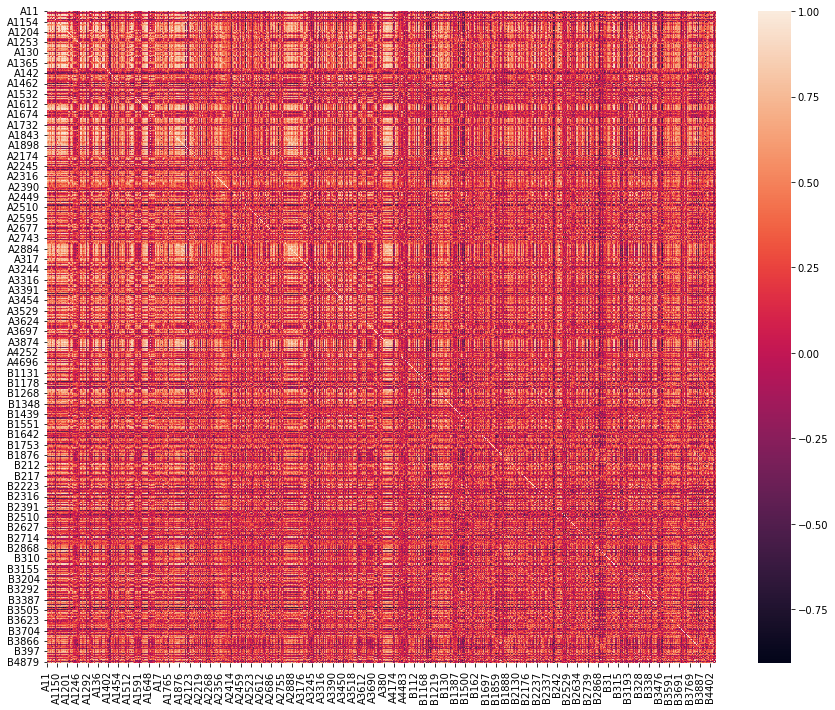

In [17]:
# dataframe = dataframe_vectors.dropna('columns')# drop columns with NaN
  
# allData_Corr = dataframe[[col for col in dataframe if dataframe[col].nunique() > 1]]# keep columns where there are more than 1 unique values
  
corr = dataframe_vectors.corr()
  
plt.figure(figsize =(15, 12))
  
sns.heatmap(corr)
  
plt.show()

In [18]:
import scipy.cluster.hierarchy as spc

pdist = spc.distance.pdist(corr.values)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')

In [19]:
clustered_cells = np.stack((selectedCells,idx), axis=1)

In [20]:
clustered_cells[clustered_cells[:,1]=="1"]

array([['A11', '1'],
       ['A1100', '1'],
       ['A1101', '1'],
       ...,
       ['B4875', '1'],
       ['B4879', '1'],
       ['B49', '1']], dtype='<U11')

# Elbow method

- speech traffic 

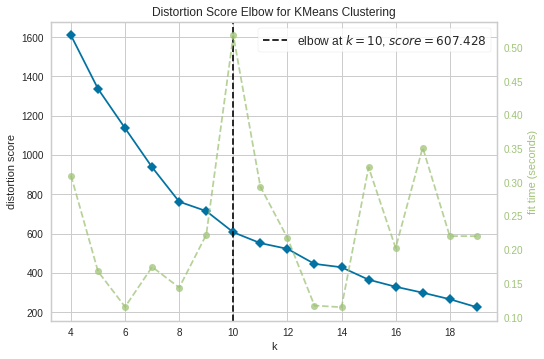

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,20))

visualizer.fit(dataframe_vectors)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

- speech and data traffic

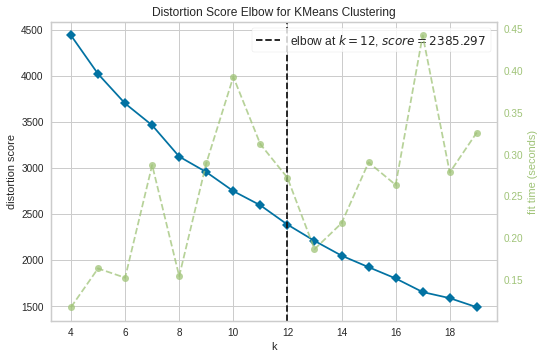

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,20))

visualizer.fit(dataframe_vectors)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# train cluster's model

In [21]:
cells_1 = clustered_cells[clustered_cells[:,1]=="1"]

In [22]:
dataframe3 = pd.DataFrame()
for i in range(len(cells_1)):
  dataframe3 = dataframe3.append(dataframe2[dataframe2.Cell == cells_1[i,0]])
dataframe3

Index Cell Tech & Band  ...  Utilization  UTIL_HIGH_CONGESTED   DATE_IDs
DATE_ID                             ...                                             
2019-03-01  52319  A11           A  ...   196.080000                 8.83 2019-03-01
2019-04-01  53227  A11           A  ...   200.679990                 8.83 2019-04-01
2019-05-01  54135  A11           A  ...   183.320010                 8.83 2019-05-01
2019-06-01  55043  A11           A  ...   188.270000                 8.83 2019-06-01
2019-07-01  55951  A11           A  ...   203.539990                 8.83 2019-07-01
...           ...  ...         ...  ...          ...                  ...        ...
2021-04-01  51475  B49           B  ...   158.020000                 8.83 2021-04-01
2021-05-01  51592  B49           B  ...   133.690000                 8.83 2021-05-01
2021-06-01  51714  B49           B  ...    99.739998                 8.83 2021-06-01
2021-07-01  51835  B49           B  ...   107.270000                 8.83 2021-07-01
2021-08-01  51956  B49           B  ...   102.500000                 8.83 2021-08-01

[21810 rows x 11 columns]

In [23]:
dataset = dataframe3.filter(['SPEECH_TRAFFIC'])

In [24]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [25]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]

In [26]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      if (i%26 == 0 and i != 0):
        i+=5
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
  
  # reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)

(17445, 2)


In [27]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [28]:
from keras.layers import Dropout
from keras.layers import Bidirectional
# model=Sequential()
# model.add(LSTM(100,activation='relu',return_sequences=True,input_shape=(look_back,1)))
# model.add(LSTM(100, activation='relu', return_sequences=True))
# model.add(LSTM(100, activation='sigmoid', return_sequences=False))
# model.add(Dense(50))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(optimizer='adam',loss='mae')

model2 = tf.keras.Sequential([
        tf.keras.layers.LSTM(100,activation='relu',return_sequences=True,input_shape=(look_back,1)),
        tf.keras.layers.LSTM(100,activation='relu',return_sequences=True),
        tf.keras.layers.LSTM(100,activation='sigmoid',return_sequences=False),
        tf.keras.layers.Dense(50),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)
        ])
model2.compile(optimizer='adam',loss='mae')

In [30]:
Xdata_train=[]
Ydata_train=[]

Xdata_train, Ydata_train = create_dataset(train, look_back)
Xdata_train = np.reshape(Xdata_train, (Xdata_train.shape[0], Xdata_train.shape[1], 1))

#training for train data
history = model2.fit(Xdata_train,Ydata_train,batch_size=100,epochs=500,shuffle=False)

Epoch 1/500
175/175 [==============================] - 6s 32ms/step - loss: 0.0111
Epoch 2/500
175/175 [==============================] - 6s 31ms/step - loss: 0.0110
Epoch 3/500
175/175 [==============================] - 6s 32ms/step - loss: 0.0109
Epoch 4/500
175/175 [==============================] - 6s 32ms/step - loss: 0.0109
Epoch 5/500
175/175 [==============================] - 6s 33ms/step - loss: 0.0109
Epoch 6/500
175/175 [==============================] - 6s 32ms/step - loss: 0.0111
Epoch 7/500
175/175 [==============================] - 6s 33ms/step - loss: 0.0110
Epoch 8/500
175/175 [==============================] - 6s 33ms/step - loss: 0.0109
Epoch 9/500
175/175 [==============================] - 6s 32ms/step - loss: 0.0110
Epoch 10/500
175/175 [==============================] - 6s 33ms/step - loss: 0.0109
Epoch 11/500
175/175 [==============================] - 6s 33ms/step - loss: 0.0109
Epoch 12/500
175/175 [==============================] - 6s 32ms/step - loss: 0.0110
E

In [31]:
def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape

In [33]:
# make predictions
trainPredict = model2.predict(trainX)
testPredict = model2.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testScoreMAE = (mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MAE' % (testScoreMAE))
testScoreMAE_Percentage = MAPE(testY[0], testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScoreMAE_Percentage))

Train Score: 1061.82 RMSE
Test Score: 1448.04 RMSE
Test Score: 607.08 MAE
Test Score: 13.71 MAPE


In [34]:
testX

array([[[0.00863196],
        [0.00660696]],

       [[0.00660696],
        [0.00763147]],

       [[0.00763147],
        [0.00708017]],

       ...,

       [[0.13148783],
        [0.07234546]],

       [[0.07234546],
        [0.06648486]],

       [[0.06648486],
        [0.06173929]]])